In [0]:
import gensim
import numpy as np
from scipy.stats import pearsonr
import pickle
from sklearn.metrics.pairwise import cosine_distances

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
% cd /content/gdrive/My\ Drive/UofT/Third\ Year/CSC2611/lab

/content/gdrive/My Drive/UofT/Third Year/CSC2611/lab


# Part 1: Synchronic word embedding

In [4]:
word2vec = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
pair_of_words = [
                 ("cord", "smile"), 
                 ("rooster", "voyage"),
                 ("noon", "string"),
                 ("fruit", "furnace"),
                 ("autograph", "shore"),
                 ("automobile", "wizard"),
                 ("mount", "stove"),
                 ("grin", "implement"),
                 ("asylum", "fruit"),
                 ("asylum", "monk"),
                 ("graveyard", "madhouse"),
                 ("glass", "magician"),
                 ("boy", "rooster"),
                 ("cushion", "jewel"),
                 ("monk", "slave"),
                 ("asylum", "cemetery"),
                 ("coast", "forest"),
                 ("grin", "lad"),
                 ("shore", "woodland"),
                 ("monk", "oracle"), 
                 ("boy", "sage"),
                 ("automobile", "cushion"),
                 ("mound", "shore"),
                 ("lad", "wizard"),
                 ("forest", "graveyard"),
                 ("food", "rooster"),
                 ("cemetery", "woodland"),
                 ("shore", "voyage"),
                 ("bird", "woodland"),
                 ("coast", "hill"),
                 ("furnace", "implement"),
                 ("crane", "rooster"),
                 ("hill", "woodland"),
                 ("car", "journey"),
                 ("cemetery", "mound"),
                 ("glass", "jewel"),
                 ("magician", "oracle"),
                 ("crane", "implement"),
                 ("brother", "lad"),
                 ("sage", "wizard"),
                 ("oracle", "sage"),
                 ("bird", "crane"),
                 ("bird", "cock"),
                 ("food", "fruit"),
                 ("brother", "monk"),
                 ("asylum", "madhouse"),
                 ("furnace", "stove"),
                 ("magician", "wizard"),
                 ("hill", "mound"),
                 ("cord", "string"),
                 ("glass", "tumbler"),
                 ("grin", "smile"), 
                 ("serf", "slave"),
                 ("journey", "voyage"),
                 ("autograph", "signature"),
                 ("coast", "shore"),
                 ("forest", "woodland"),
                 ("implement", "tool"),
                 ("cock", "rooster"),
                 ("boy", "lad"),
                 ("cushion", "pillow"),
                 ("cemetery", "graveyard"), 
                 ("automobile", "car"),
                 ("midday", "noon"),
                 ("gem", "jewel")
                 ]

word_to_embedding_map = {}
words1 = np.zeros((len(pair_of_words), 300))
words2 = np.zeros((len(pair_of_words), 300))

In [0]:
for i, (word1, word2) in enumerate(pair_of_words):
  if word1 not in word_to_embedding_map:
    word_to_embedding_map[word1] = word2vec[word1]
  
  if word2 not in word_to_embedding_map:
    word_to_embedding_map[word2] = word2vec[word2]

  words1[i] = word2vec[word1]
  words2[i] = word2vec[word2]

In [7]:
element_wise_dot = np.einsum("ij,ij->i", words1, words2)
norms1, norms2 = np.linalg.norm(words1, axis=1), np.linalg.norm(words2, axis=1)
cosine_similarity = element_wise_dot / (norms1 * norms2)
cosine_similarity

array([ 1.81164421e-02,  6.27580950e-02,  2.16545145e-02,  7.32149730e-02,
        3.46559162e-02, -2.80874218e-02,  4.92562217e-02, -2.30547151e-04,
        5.78096250e-02,  1.38668242e-01,  2.93968170e-01,  3.72249104e-02,
        2.84851900e-01,  1.24784413e-01,  1.91462271e-01,  9.24352137e-02,
        2.36097900e-01,  2.48018869e-01,  1.16909462e-01,  3.03540362e-01,
        1.65956929e-01,  1.33585848e-01,  1.31641308e-01,  3.30230061e-01,
        2.29011213e-01,  1.18306467e-01,  3.81925048e-01,  2.04348489e-01,
        3.40242517e-01,  1.61157755e-01,  2.34294824e-02,  2.36072140e-01,
        2.73590949e-01,  9.84962503e-02,  2.06040934e-01,  1.74493590e-01,
        2.52207744e-01,  2.31861539e-02,  3.59592489e-01,  3.38115044e-01,
        4.42570724e-01,  3.02861911e-01,  3.62902420e-01,  3.74092599e-01,
        2.23200200e-01,  2.52539301e-01,  6.08391065e-01,  4.86349616e-01,
        4.62203262e-01,  1.89512521e-01,  4.67516601e-01,  8.60401000e-01,
        4.49844203e-01,  

In [8]:
for i in range(len(cosine_similarity)):
  word1, word2 = pair_of_words[i]
  cosine_sim = cosine_similarity[i]
  print(f"{word1}; {word2}: {cosine_sim}")

cord; smile: 0.018116442126818393
rooster; voyage: 0.06275809503788346
noon; string: 0.02165451453599645
fruit; furnace: 0.07321497303845254
autograph; shore: 0.034655916200793474
automobile; wizard: -0.02808742179782148
mount; stove: 0.049256221719463845
grin; implement: -0.00023054715138644667
asylum; fruit: 0.05780962502651894
asylum; monk: 0.13866824166204164
graveyard; madhouse: 0.29396817045820234
glass; magician: 0.037224910380892116
boy; rooster: 0.2848518997190719
cushion; jewel: 0.12478441292362313
monk; slave: 0.19146227120982814
asylum; cemetery: 0.09243521370466698
coast; forest: 0.23609790007924333
grin; lad: 0.2480188694136008
shore; woodland: 0.11690946166507768
monk; oracle: 0.30354036186223615
boy; sage: 0.16595692925794378
automobile; cushion: 0.13358584792553976
mound; shore: 0.13164130789280562
lad; wizard: 0.33023006071411043
forest; graveyard: 0.22901121328397625
food; rooster: 0.11830646680620911
cemetery; woodland: 0.38192504756514994
shore; voyage: 0.204348488

In [0]:
human_similarity = np.array([0.02, 0.04, 0.04, 0.05, 0.06, 0.11, 0.14, 0.18, 0.19, 0.39, 0.42, 0.44, 0.44,
                             0.45, 0.57, 0.79, 0.85, 0.88, 0.90, 0.91, 0.96, 0.97, 0.97, 0.99, 1.00, 1.09, 
                             1.18, 1.22, 1.24, 1.26, 1.37, 1.41, 1.48, 1.55, 1.69, 1.78, 1.82, 2.37, 2.41, 
                             2.46, 2.61, 2.63, 2.63, 2.69, 2.74, 3.04, 3.11, 3.21, 3.29, 3.41, 3.45, 3.46, 
                             3.46, 3.58, 3.59, 3.60, 3.65, 3.66, 3.68, 3.82, 3.84, 3.88, 3.92, 3.94, 3.94])

In [10]:
# Pearson correlation coefficient
cosine_mean = cosine_similarity.mean()
human_mean = human_similarity.mean()
cosine_std = cosine_similarity.std()
human_std = human_similarity.std()
pearson_correlation = ((cosine_similarity - cosine_mean) * (human_similarity - human_mean)).sum() / (cosine_std * human_std)

covariance = ((cosine_similarity - cosine_mean) * (human_similarity - human_mean)).sum()
std = np.sqrt(((cosine_similarity - cosine_mean) ** 2).sum()) * np.sqrt(((human_similarity - human_mean) ** 2).sum())
pearson_correlation = covariance / std
pearson_correlation

0.7838683898261164

In [11]:
# We will extract the subset of the testing data that can be used by both the 
# LSA and word2vec models
lsa_word_file = open("wti.txt").readlines()[:]
lsa_words = {}
for line in lsa_word_file:
  word, i = line.strip().split()
  lsa_words[word] = int(i)
word2vec_words = set(word2vec.index2word)

testing_examples = []
with open("word-test.v1.txt") as test_file:
  test_file = test_file.readlines()[2:]    # first 2 lines irrelevant
  
  for line in test_file:
    line = line.strip().split()
    if len(line) == 4:
      start, subtract, add, expected = line
      if all(word in lsa_words 
             for word in [start, subtract, add, expected]) and \
         all(word in word2vec_words 
             for word in [start, subtract, add, expected]):
        testing_examples.append((start, subtract, add, expected))

print("Number of testing examples:", len(testing_examples)) 

Number of testing examples: 2082


In [12]:
# 5 first and 5 last training examples:
some_examples = testing_examples[:5] + testing_examples[-5:]
for start, subtract, add, expected in some_examples:
  print(f"{start} - {subtract} + {add} = {expected}")

boy - girl + brother = sister
boy - girl + father = mother
boy - girl + he = she
boy - girl + his = her
boy - girl + husband = wife
write - writes + provide = provides
write - writes + say = says
write - writes + see = sees
write - writes + think = thinks
write - writes + work = works


In [0]:
# we know extract the word2vec and LSA embeddings for our words
# we first need to load the LSA word embeddings file extracted from the exercise
lsa_embeddings = np.load("ppmi_dim300.npy")
word2vec_embeddings = word2vec

start_vecs_lsa = np.zeros((2082, 300))
sub_vecs_lsa = np.zeros((2082, 300))
add_vecs_lsa = np.zeros((2082, 300))
expected_vecs_lsa = np.zeros((2082, 300))

for i, (start, subtract, add, expected) in enumerate(testing_examples):
  # extract LSA word embeddings
  # lsa_words is a map of word -> idx in the lsa_embeddings model
  start_lsa = lsa_embeddings[lsa_words[start]]
  sub_lsa = lsa_embeddings[lsa_words[subtract]]
  add_lsa = lsa_embeddings[lsa_words[add]]
  expected_lsa = lsa_embeddings[lsa_words[expected]]

  start_vecs_lsa[i] = start_lsa
  sub_vecs_lsa[i] = sub_lsa
  add_vecs_lsa[i] = add_lsa
  expected_vecs_lsa[i] = expected_lsa

In [14]:
total = 2082
correct = 0

for a, b, c, d in testing_examples:
  pred = word2vec_embeddings.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
  if pred == d:
    correct += 1

print("Word2Vec analogy accuracy:", correct / total)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Word2Vec analogy accuracy: 0.6853986551392891


In [0]:
idx_to_word_lsa = {lsa_words[word]: word for word in lsa_words}

def unit_vec(vecs, axis=1):
  return vecs / np.linalg.norm(vecs, axis=axis).reshape(-1, 1)


def most_similar(positives1, positives2, negatives, vocab):
  positives1 = unit_vec(positives1)
  positives2 = unit_vec(positives2)
  negatives = -1 * unit_vec(negatives)
  
  mean = np.concatenate((positives1, positives2, negatives), axis=1).reshape(positives1.shape[0], 3, -1)
  mean = mean.mean(axis=1)
  mean = (mean / np.linalg.norm(mean)).astype(np.float32)

  dists = mean @ unit_vec(vocab).T
  best = np.argmin(dists, axis=1).reshape(-1)
  
  return [idx_to_word_lsa[i] for i in best]

In [0]:
results_lsa = most_similar(positives1=sub_vecs_lsa, positives2=add_vecs_lsa, negatives=start_vecs_lsa, vocab=lsa_embeddings)

In [17]:
accuracy = [1 if results_lsa[i] == testing_examples[i][-1] else 0 for i in range(len(results_lsa))]
sum(accuracy) / len(accuracy)

0.0

# Part 2: Diachronic word embedding

In [0]:
diachronic = pickle.load(open("data.pkl", "rb"))

In [19]:
# some words
print("\n".join(diachronic["w"][:10]))

time
man
years
part
way
life
people
work
world
states


In [20]:
dia_embeddings = diachronic["E"]
dia_embeddings = np.array(dia_embeddings)
dia_embeddings.shape

(2000, 10, 300)

In [0]:
def display_info(change_between_first_last_step, change_through_each_time_step, criteria, extreme=20):
  print(f"Criteria: {criteria}")
  average_change = change_through_each_time_step.mean(axis=1)
  ranked_average_change = np.argsort(average_change)
  ranked_first_to_last_change = np.argsort(change_between_first_last_step)

  top20_avg = ranked_average_change[-extreme:]
  top20_avg = [diachronic["w"][i] for i in top20_avg][::-1]
  bottom20_avg = ranked_average_change[:extreme]
  bottom20_avg = [diachronic["w"][i] for i in bottom20_avg]

  top20_first_to_last = ranked_first_to_last_change[-extreme:]
  top20_first_to_last = [diachronic["w"][i] for i in top20_first_to_last][::-1]
  bottom20_first_to_last = ranked_first_to_last_change[:extreme]
  bottom20_first_to_last = [diachronic["w"][i] for i in bottom20_first_to_last]

  print("Change in meaning on average through each decade:")
  print("Top {0}:\n{1}".format(extreme, '\n'.join(top20_avg)))
  print("Bottom {0}:\n{1}".format(extreme, '\n'.join(bottom20_avg)))

  print("Change in meaning from first decade to last decade:")
  print("Top {0}:\n{1}".format(extreme, '\n'.join(top20_first_to_last)))
  print("Bottom {0}:\n{1}".format(extreme, '\n'.join(bottom20_first_to_last)))

## Cosine distance

In [0]:
# we will quantify semantic change by using cosine distance to measure how far 
# apart vectors of a word are at different decades
def diachronic_cosine_distance(data):
  # processing the entirety of our vocab
  dot = np.einsum("ijk,ilk->ijl", data, data)
  norm = np.linalg.norm(data, axis=2)
  norm_prod = np.einsum("ij,ik->ijk", norm, norm)
  distances = 1 - (dot / norm_prod)
  # distances[w, t, t'] = distance between vector of word w in time t and time t'
  return distances

In [23]:
distances = diachronic_cosine_distance(dia_embeddings)
distances.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


(2000, 10, 10)

In [24]:
through_time_cos = np.diagonal(distances, offset=1, axis1=1, axis2=2)
through_time_cos[0]

array([0.31214306, 0.32058121, 0.35237205, 0.33332696, 0.37701513,
       0.38991383, 0.35640704, 0.31868191, 0.35110625])

In [25]:
first_last_cos = distances[:, 0, -1]
first_last_cos[0]

0.5497114487693748

In [26]:
display_info(first_last_cos, through_time_cos, "Cosine Distance")

Criteria: Cosine Distance
Change in meaning on average through each decade:
Top 20:
shri
skills
ml
mcgraw
techniques
computer
harper
jones
sector
berkeley
wiley
baltimore
martin
princeton
wilson
adams
therapy
johnson
goals
haven
Bottom 20:
april
miles
november
september
january
december
february
university
vessels
trees
cent
solution
july
decrease
october
temperature
buildings
june
patients
blood
Change in meaning from first decade to last decade:
Top 20:
mcgraw
skills
ml
techniques
programs
objectives
computer
radio
sector
goals
approach
van
shri
media
impact
perspective
patterns
berkeley
shift
film
Bottom 20:
april
june
november
february
years
october
increase
january
century
months
daughter
december
god
september
feet
week
evening
door
payment
miles


## k-Nearest Neighbors

In [0]:
# here, we quantify the semantic drift of a word by measuring the cosine 
# distance of the average vector between k nearest neighbors of the word
# vector between 2 time points
def knn_3dimensional(vectors, k):
  vectors = vectors.transpose(1, 0, 2)
  num_decades = vectors.shape[0]
  num_words = num_neighbors + 1
  dimension = vectors.shape[-1]

  targets = vectors[:, :, None]
  neighbors = vectors[:, None]
  diff = targets - neighbors
  dist = (diff ** 2).sum(axis=3)

  ranking = dist.argsort()

  # at position 1 is the vector itself so obviously the vector itself
  # would be included in its k nearest neighbors, we want to exclude it
  indices = ranking[:, :, 1: k + 1].reshape(-1)     # TODO: need offset
  vectors = vectors.reshape(-1, vectors.shape[-1])
  chosen = vectors[indices].reshape(num_decades, num_words, k, dimension)

  return chosen

def knn_2dimensional(word, neighbors, k):
  decs, dim = word.shape
  neighs = neighbors.shape[1]

  diff = word[:, None] - neighbors
  dist = (diff ** 2).sum(axis=2)
  rank = dist.argsort()
  idx = rank[:, 1:k+1]
  offset_idx = idx + np.arange(0, decs * neighs, neighs).reshape(-1, 1)
  chosen = neighbors.reshape(-1, dim)[offset_idx.reshape(-1)]

  return chosen.reshape(decs, k, dim)

def knn(vectors, k, sequential=True, verbose=False):
  num_neighbors = vectors.shape[0] - 1     # number of words - 1
  if k > num_neighbors:
    raise ValueError("k should be at most the number of neighbors")

  if not sequential:
    return knn_3dimensional(word, k) 
  else:
    final = np.zeros((vectors.shape[1], vectors.shape[0], k, vectors.shape[2]))
    for i in range(vectors.shape[0]):
      if verbose:
        print("Computing kNN for word number", i + 1)
      word = vectors[i]
      neighbors = vectors.transpose(1, 0, 2)
      chosen = knn_2dimensional(word, neighbors, k)
      final[:, i] = chosen

  return final

def neighbors_shift(neighbors):
  neighbors_mean = neighbors.mean(axis=2).transpose(1, 0, 2)
  return diachronic_cosine_distance(neighbors_mean)

In [0]:
neighbors_distances = knn(dia_embeddings, 100)
neighbors_changes = neighbors_shift(neighbors_distances)
through_time_knn = np.diagonal(neighbors_changes, offset=1, axis1=1, axis2=2)
first_last_knn = neighbors_changes[:, 0, -1]

In [29]:
display_info(first_last_knn, through_time_knn, "Average kNN Cosine Distance")

Criteria: Average kNN Cosine Distance
Change in meaning on average through each decade:
Top 20:
shri
computer
strike
ml
place
mcgraw
techniques
skills
marks
instance
mark
game
rest
succession
part
order
search
fashion
sector
sign
Bottom 20:
william
hydrogen
coast
islands
chicago
payment
velocity
earl
boston
oxygen
university
continent
dioxide
ions
san
daughter
philadelphia
carbon
lake
density
Change in meaning from first decade to last decade:
Top 20:
ml
approach
radio
signal
objectives
sector
computer
film
impact
mcgraw
center
release
host
media
goals
programs
techniques
skills
focus
assessment
Bottom 20:
profits
thomas
taxes
payment
velocity
purchase
coast
increase
acids
san
assets
oxygen
shares
loan
richard
fluid
acid
money
desert
increases


## Euclidean Distance

In [0]:
def diachronic_euclidean_distance(data):
  diff = data[:, :, None] - data[:, None, :]
  dist = (diff ** 2).sum(axis=3)
  return dist

In [0]:
euc_distances = diachronic_euclidean_distance(dia_embeddings)
through_time_euc = np.diagonal(euc_distances, offset=1, axis1=1, axis2=2)
first_last_euc = euc_distances[:, 0, -1]

In [32]:
display_info(first_last_euc, through_time_euc, "Euclidean Distance")

Criteria: Euclidean Distance
Change in meaning on average through each decade:
Top 20:
harper
jones
sector
berkeley
wiley
baltimore
martin
princeton
wilson
adams
therapy
johnson
goals
haven
philip
evaluation
j
mcgraw
publications
stanford
Bottom 20:
april
miles
november
september
january
december
february
university
vessels
trees
cent
solution
july
decrease
october
temperature
buildings
june
patients
blood
Change in meaning from first decade to last decade:
Top 20:
programs
objectives
computer
radio
sector
goals
approach
van
shri
media
impact
perspective
patterns
berkeley
shift
film
assessment
stanford
challenge
therapy
Bottom 20:
april
june
november
february
years
october
increase
january
century
months
daughter
december
god
september
feet
week
evening
door
payment
miles


## Intercorrelations

In [33]:
p_coefficient = np.zeros((3, 3))
results = [first_last_cos, first_last_knn, first_last_euc]

i_to_m = {0: "cos", 1: "knn", 2: "euc"}

for i in range(3):
  for j in range(3):
    ignore = None
    if not i or not j:
      ignore = np.where(np.isfinite(first_last_cos) == False)
    
    metric1 = results[i]
    metric2 = results[j]
    if ignore is not None:
      metric1 = np.delete(metric1, ignore)
      metric2 = np.delete(metric2, ignore)

    print(f"computing correlation between {i_to_m[i]} and {i_to_m[j]}")
    coeff = pearsonr(metric1, metric2)[0]
    print("got:", coeff)
    p_coefficient[i, j] = coeff

p_coefficient

computing correlation between cos and cos
got: 1.0
computing correlation between cos and knn
got: 0.5120349769366228
computing correlation between cos and euc
got: 1.0
computing correlation between knn and cos
got: 0.5120349769366228
computing correlation between knn and knn
got: 1.0
computing correlation between knn and euc
got: 0.494665465899663
computing correlation between euc and cos
got: 1.0
computing correlation between euc and knn
got: 0.494665465899663
computing correlation between euc and euc
got: 1.0


array([[1.        , 0.51203498, 1.        ],
       [0.51203498, 1.        , 0.49466547],
       [1.        , 0.49466547, 1.        ]])

In [34]:
from collections import defaultdict

evaluation = defaultdict(list)

for test_data in ["20WordsEvaluator1.csv", 
                  "20WordsEvaluator2.csv", 
                  "20WordsEvaluator3.csv"]:
  with open(test_data) as test_file:
    test_file = test_file.readlines()[1:]
    for line in test_file:
      word, _, changed, _ = line.strip().split(",")
      if changed.isnumeric():
        evaluation[word].append(int(changed))

evaluation = {word: np.array(evaluation[word]).mean() for word in evaluation}
evaluation

{'army': 0.0,
 'aroma': 0.0,
 'avenue': 0.0,
 'bloody': 0.6666666666666666,
 'bomb': 0.3333333333333333,
 'books': 0.0,
 'bothers': 0.0,
 'breasts': 0.6666666666666666,
 'bus': 1.0,
 'cancer': 1.0,
 'chase': 0.6666666666666666,
 'closest': 0.0,
 'concrete': 0.3333333333333333,
 'curb': 0.0,
 'dad': 0.0,
 'damn': 0.6666666666666666,
 'darlin': 0.0,
 'disbelief': 0.3333333333333333,
 'fooling': 0.0,
 'foyer': 0.0,
 'frustration': 0.3333333333333333,
 'gorgeous': 0.3333333333333333,
 'hind': 0.0,
 'inc': 0.0,
 'intelligence': 0.3333333333333333,
 'killer': 0.6666666666666666,
 'know': 0.0,
 'motor': 0.6666666666666666,
 'originator': 0.0,
 'papa': 0.3333333333333333,
 'passenger': 0.3333333333333333,
 'patrol': 0.0,
 'phone': 1.0,
 'plan': 0.3333333333333333,
 'press': 1.0,
 'prize': 0.3333333333333333,
 'random': 0.3333333333333333,
 'repeat': 0.6666666666666666,
 'repelling': 0.0,
 'rib': 0.0,
 'rick': 0.0,
 'shower': 1.0,
 'sip': 0.3333333333333333,
 'slightly': 0.0,
 'sob': 0.33333333

In [35]:
idx = {}
for i, word in enumerate(diachronic["w"]):
  if word in evaluation:
    idx[i] = word

idx

{98: 'press',
 220: 'army',
 233: 'books',
 308: 'plan',
 455: 'supreme',
 1072: 'intelligence',
 1093: 'motor',
 1659: 'cancer',
 1663: 'avenue'}

In [36]:
results = [first_last_cos, first_last_knn, first_last_euc]

i_to_m = {0: "cos", 1: "knn", 2: "euc"}
keys = list(idx.keys())
expected_change = np.array([evaluation[v] for v in idx.values()])
for i in range(len(results)):
  change_from_results = np.take(results[i], keys)
  pearson_coeff = pearsonr(expected_change, change_from_results)[0]
  print(f"Accuracy for method {i_to_m[i]} using Pearson Correlation:", pearson_coeff)

Accuracy for method cos using Pearson Correlation: 0.43441324175136753
Accuracy for method knn using Pearson Correlation: 0.20449106250538848
Accuracy for method euc using Pearson Correlation: 0.43441324175136803


In [0]:
import matplotlib.pyplot as plt

def detect_change_point(changes, threshold):
  decs = diachronic["d"]
  points = []
  change_from_last_point = []
  in_use = changes[0]
  previous = in_use
  for i in range(changes.shape[0]):
    if in_use[i] >= threshold:
      points.append(decs[i])
      previous = in_use
      in_use = changes[i]
      change_from_last_point.append(previous[i])
    else:
      change_from_last_point.append(in_use[i])

  plt.plot(decs, change_from_last_point)
  plt.show()

  return points
    

In [38]:
most_changed = first_last_euc.argsort()[-3:]
word1 = euc_distances[most_changed[0]]
word2 = euc_distances[most_changed[1]]
word3 = euc_distances[most_changed[2]]
print("Top 3 changing words using euclidean distance:")
print(diachronic["w"][most_changed[0]])
print(diachronic["w"][most_changed[1]])
print(diachronic["w"][most_changed[2]])

Top 3 changing words using euclidean distance:
computer
objectives
programs


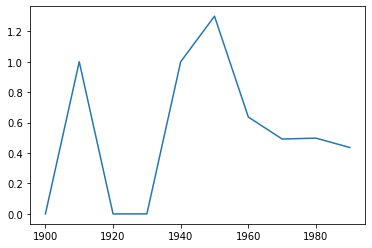

[1910, 1940, 1950, 1960, 1970, 1980, 1990]

In [39]:
detect_change_point(word1, 0.4)

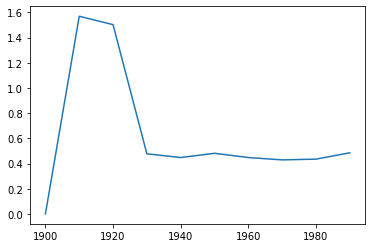

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

In [40]:
detect_change_point(word2, 0.4)

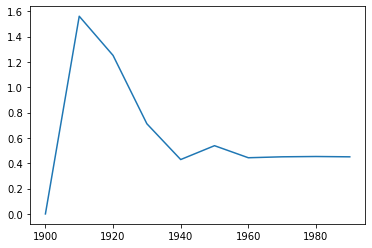

[1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]

In [41]:
detect_change_point(word3, 0.4)